This note provides basic idea to check the normality and understand the statistics of the return data. It can help you to link to our lectures on the lognormal and normal properties of stock price and returns.

Load libraries

In [0]:
import numpy as np  # array operations
import pandas as pd  # dataframe
import scipy.stats as scs
import statsmodels.api as sm
from pylab import plt
plt.style.use('ggplot')
# put all plots in the notebook itself
%matplotlib inline

Download some stock data from the Yahoo Finance as we did in the first tutor.

In [1]:
from pandas_datareader import data
TSM = data.DataReader("TSM", start='2010-1-1', end='2019-12-31', data_source='yahoo')
TSM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,11.69,11.47,11.49,11.58,8096400.0,8.186360
2010-01-05,11.66,11.46,11.60,11.53,14375900.0,8.151016
2010-01-06,11.61,11.38,11.56,11.49,13608400.0,8.122736
2010-01-07,11.44,11.07,11.41,11.11,27346600.0,7.854100
2010-01-08,11.22,11.03,11.14,11.10,16895300.0,7.847031


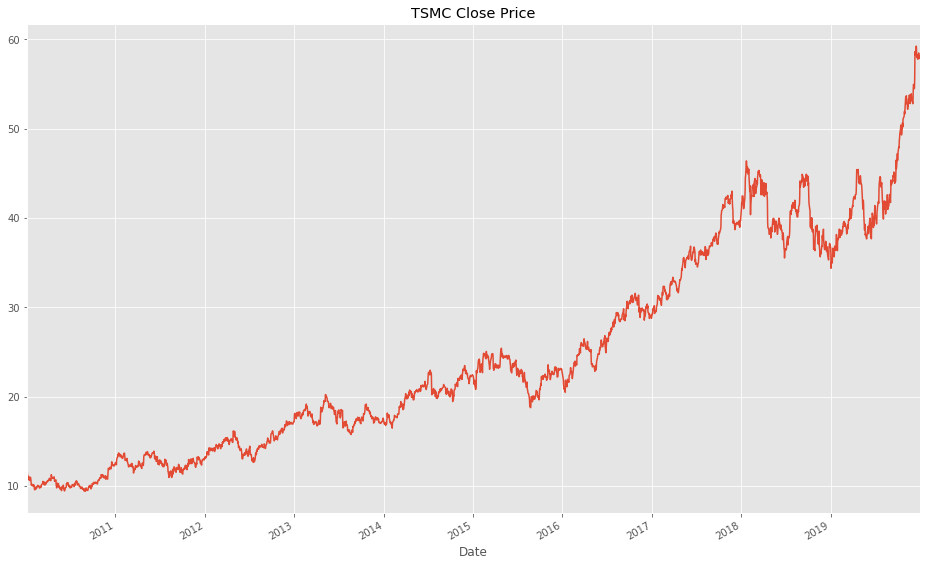

In [3]:
TSM['Close'].plot(figsize=(16, 10), grid=True, title='TSMC Close Price')

In [4]:
TSM['Return'] = np.log(TSM['Close'] / TSM['Close'].shift(1))
TSM


,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,
2010-01-04,11.690000,11.470000,11.490000,11.580000,8096400.0,8.186360,NaN
2010-01-05,11.660000,11.460000,11.600000,11.530000,14375900.0,8.151016,-0.004327
2010-01-06,11.610000,11.380000,11.560000,11.490000,13608400.0,8.122736,-0.003475
2010-01-07,11.440000,11.070000,11.410000,11.110000,27346600.0,7.854100,-0.033631
2010-01-08,11.220000,11.030000,11.140000,11.100000,16895300.0,7.847031,-0.000900
...,...,...,...,...,...,...,...
2019-12-24,58.090000,57.549999,57.990002,57.759998,2692200.0,57.759998,-0.007932
2019-12-26,58.349998,57.759998,57.799999,58.250000,2490400.0,58.250000,0.008448
2019-12-27,58.709999,58.330002,58.529999,58.459999,2847800.0,58.459999,0.003599


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21d7c6c7f0>,
      dtype=object)

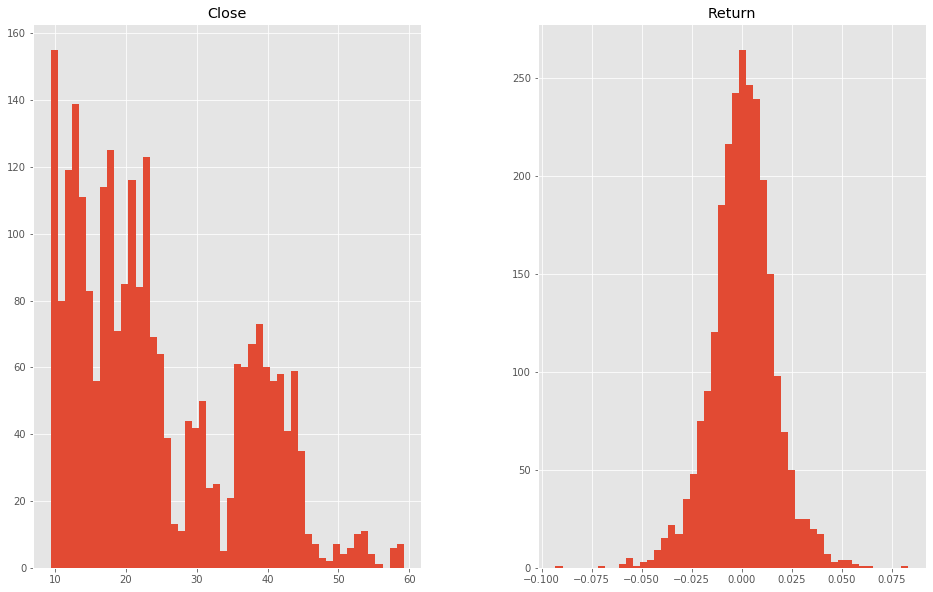

In [7]:
TSM[['Close', 'Return']].hist(bins=50, figsize=(16, 10))

In [10]:
TSM[['Close', 'Return']].describe()

,Close,Return
count,2516.000000,2515.000000
mean,24.553315,0.000641
std,11.576921,0.015775
min,9.400000,-0.093090
25%,14.680000,-0.008483
50%,21.395000,0.000823
75%,35.642500,0.010002
max,59.230000,0.083325


In [18]:
scs.describe(TSM['Return'].dropna()) # to see skewness & kurtosis

DescribeResult(nobs=2515, minmax=(-0.09309049618797655, 0.08332462595295649), mean=0.0006413066290411361, variance=0.00024884058684507797, skewness=-0.09993077908397481, kurtosis=1.8043716042021032)

Another good skim for the normality data is to check the Q-Q plot:


Text(0, 0.5, 'sample quantiles')

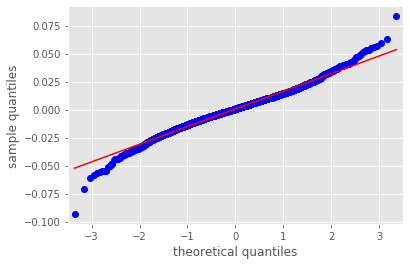

In [21]:
sm.qqplot(TSM['Return'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Lastly, we do the normality test. `scipy` gives us several functions to do the test:

- [`skewtest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html#scipy.stats.skewtest)
- [`kurtosistest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosistest.html#scipy.stats.kurtosistest)
- [`normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest)


In [23]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print("Skew of data set  %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])
    
normality_tests(TSM['Return'].dropna())

Skew of data set          -0.100
Skew test p-value          0.041
Kurt of data set           1.804
Kurt test p-value          0.000
Norm test p-value          0.000


Now, please read the results and conclude.